<a href="https://colab.research.google.com/github/yamunajayan/space_launch_data_analysis/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f" the shape of data set is {df_data.shape}")
print(f" the data set has {df_data.shape[0]} rows and {df_data.shape[1]} columns")


 the shape of data set is (4324, 9)
 the data set has 4324 rows and 9 columns


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
print(f"Is there any duplicates {df_data.duplicated().values.any()}")
print(f"Is there any duplicates {df_data.isna().values.any()}")


Is there any duplicates False
Is there any duplicates True


In [ ]:
df_data_clean = df_data.dropna()
df_data_clean = df_data_clean.drop_duplicates()
df_data_clean.shape

(964, 9)

## Descriptive Statistics

In [ ]:
df_data_clean.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


In [ ]:
df_data_clean = df_data_clean.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df_data_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
organization_counts = df_data_clean['Organisation'].value_counts()
organization_counts

CASC               158
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
ILS                 13
Eurockot            13
Rocket Lab          13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
Sandia               1
Virgin Orbit         1
ESA                  1
ExPace               1
EER                  1
Name: Organisation, dtype: int64

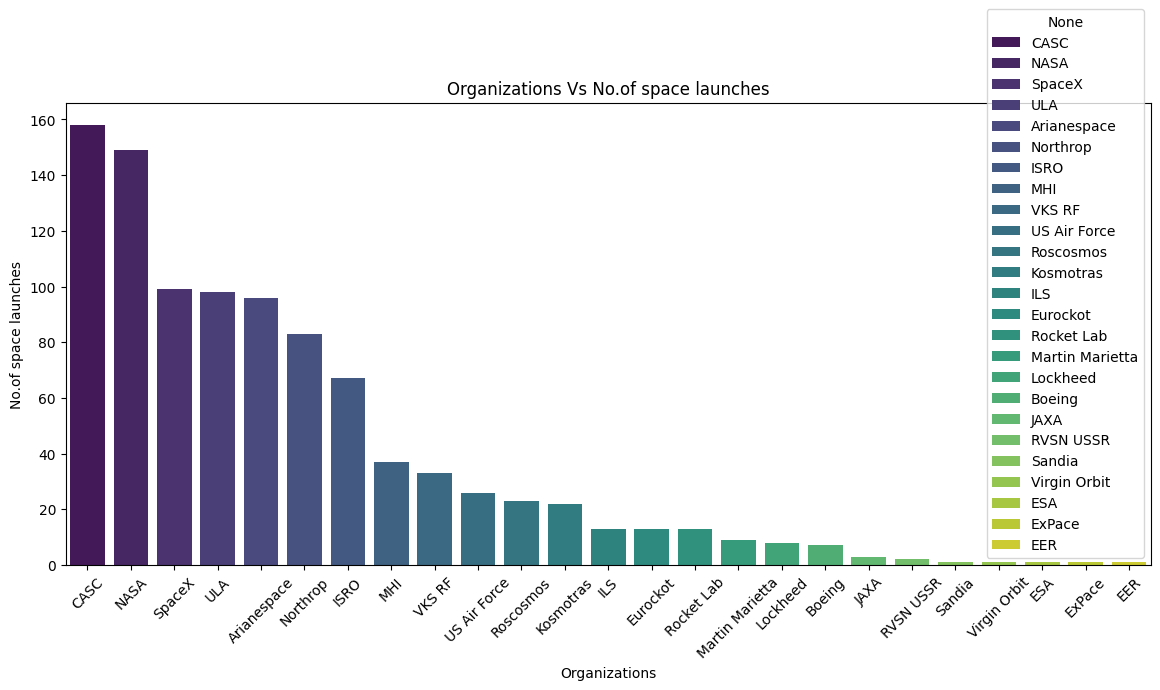

In [ ]:
plt.figure(figsize=(14, 6))

# Use Seaborn for a better bar chart
sns.barplot(x=organization_counts.index,
            y=organization_counts.values,
            palette='viridis',
            hue=organization_counts.index,
            dodge=False, legend=True)
plt.xlabel('Organizations')
plt.ylabel('No.of space launches')
plt.title('Organizations Vs No.of space launches')
plt.xticks(rotation=45)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
rocket_status = df_data_clean['Rocket_Status'].value_counts()
rocket_status

StatusActive     586
StatusRetired    378
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status = df_data_clean['Mission_Status'].value_counts()
mission_status

Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: Mission_Status, dtype: int64

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
df_data_clean['Price'] = pd.to_numeric(df_data_clean['Price'].str.replace(',', ''))

In [ ]:
# Sort the DataFrame by the "Price" column in ascending order
#df_data_clean['Price'] = pd.to_numeric(df_data_clean['Price'].str.replace(',', ''))

df_data_clean.Price.describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

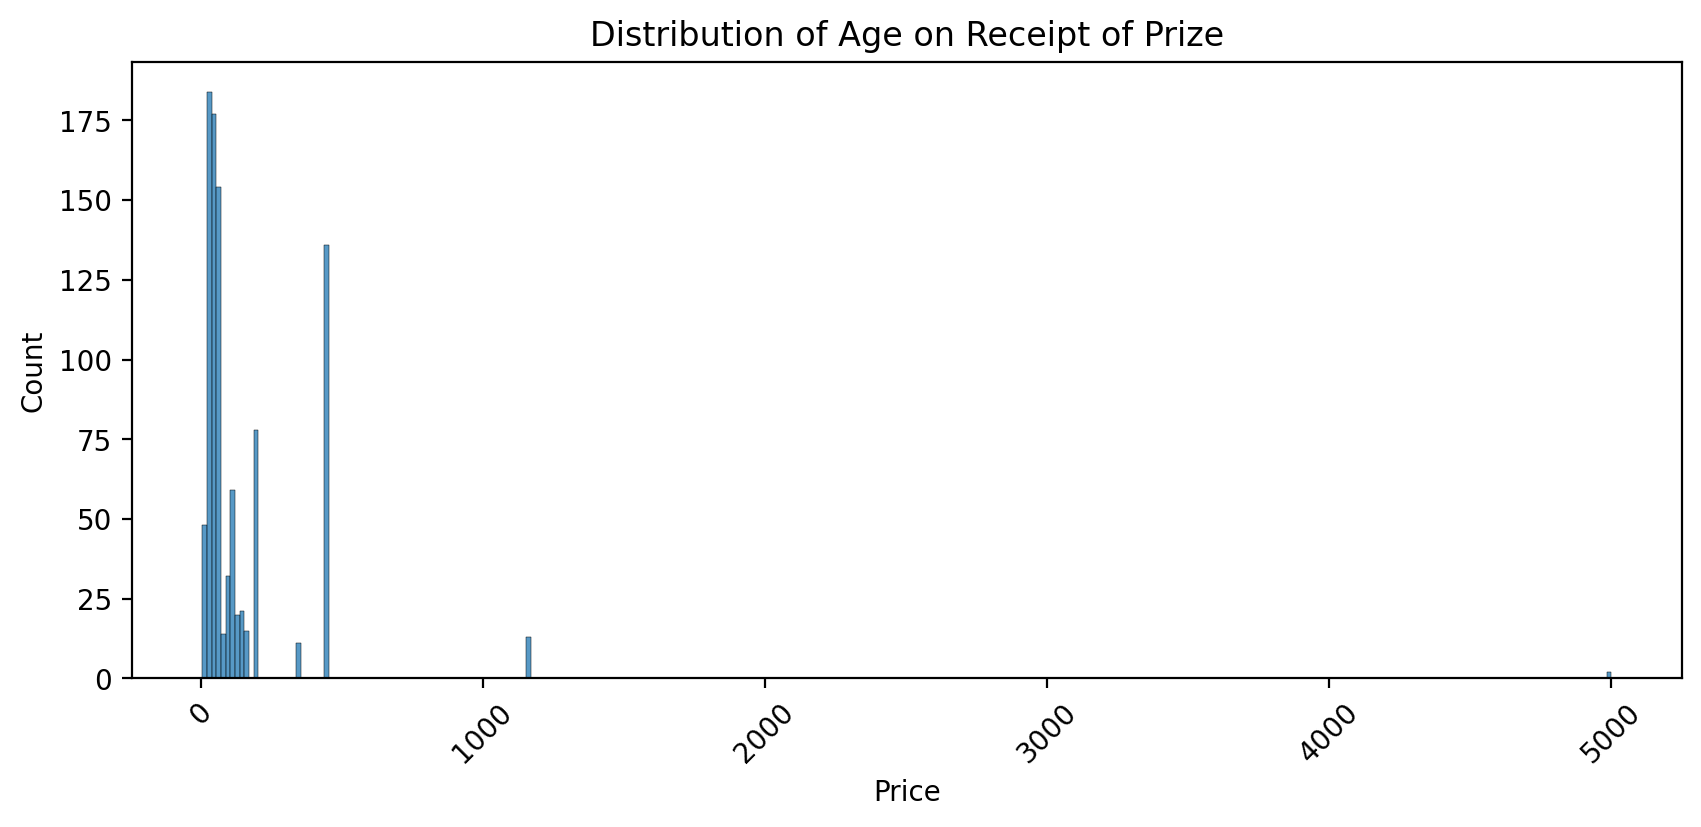

In [ ]:
plt.figure(figsize=(10, 4), dpi=200)
sns.histplot(data=df_data_clean,
             x=df_data_clean.Price,
             bins=300)
plt.xlabel('Price')
plt.xticks(rotation=45)
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
location_counts = df_data_clean['Location'].value_counts()
location_counts

LC-39A, Kennedy Space Center, Florida, USA                                                 120
ELA-3, Guiana Space Centre, French Guiana, France                                           78
SLC-41, Cape Canaveral AFS, Florida, USA                                                    69
SLC-40, Cape Canaveral AFS, Florida, USA                                                    60
LC-39B, Kennedy Space Center, Florida, USA                                                  52
First Launch Pad, Satish Dhawan Space Centre, India                                         41
LC-2, Xichang Satellite Launch Center, China                                                35
Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China                                   35
SLC-4W, Vandenberg AFB, California, USA                                                     35
Site 133/3, Plesetsk Cosmodrome, Russia                                                     31
LA-Y1, Tanegashima Space Center, Japan            

In [ ]:
# Add a new column 'Countries' to df_data_clean
df_data_clean['Countries'] = df_data_clean['Location'].apply(lambda x: x.split(",")[-1].strip())
df_data_clean.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Month,Year,Countries
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29,Titan IIIB | KH-8,StatusRetired,59.00,Success,July,1966,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,May,1965,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,Titan IIIA | LES 1,StatusRetired,63.23,Success,February,1965,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,December,1964,USA
4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-09-01,Titan IIIA | Transtage 1,StatusRetired,63.23,Failure,September,1964,USA


In [ ]:
country_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}

# Apply country name changes using replace
df_data_clean['Countries'] = df_data_clean['Countries'].replace(country_mapping)


In [ ]:
location_counts = df_data_clean['Countries'].value_counts()
location_counts

USA                   490
China                 159
France                 95
India                  67
Russian Federation     54
Kazakhstan             46
Japan                  40
New Zealand            13
Name: Countries, dtype: int64

In [ ]:
countries.get('USA').alpha3
def alpha3_country(country):
  return countries.get(country).alpha3

df_data_clean['ISO'] = df_data_clean['Countries'].apply(alpha3_country)
df_data_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Month,Year,Countries,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,August,2020,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,August,2020,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,July,2020,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,July,2020,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,July,2020,China,CHN


In [ ]:
df_countries = df_data_clean.groupby(['ISO', 'Countries'],as_index=False).agg({'Price': pd.Series.count})
df_countries.sort_values('Price', ascending=False)

,ISO,Countries,Price
7,USA,USA,490
0,CHN,China,159
1,FRA,France,95
2,IND,India,67
6,RUS,Russian Federation,54
4,KAZ,Kazakhstan,46
3,JPN,Japan,40
5,NZL,New Zealand,13


In [ ]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='Price',
                          hover_name='Countries',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
df_mission_status = df_data_clean.groupby(['ISO','Mission_Status'],as_index=False).agg({'Countries': pd.Series.count})
df_mission_status.sort_values('Countries', ascending=False)
df_mission_status = df_mission_status.rename(columns={'Countries': 'Count'})
df_mission_failure = df_mission_status[df_mission_status['Mission_Status']=='Failure']
df_mission_failure.head()

,ISO,Mission_Status,Count
0,CHN,Failure,4
3,FRA,Failure,2
6,IND,Failure,5
10,KAZ,Failure,2
13,NZL,Failure,2


In [ ]:
world_map = px.choropleth(df_mission_failure,
                          locations='ISO',
                          color='Count',
                          hover_name='ISO',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
df_sunburst = df_data_clean.groupby(['Countries', 'Mission_Status', 'Organisation'], as_index=False).agg({'ISO': 'count'})
df_sunburst = df_sunburst.rename(columns={'ISO': 'Count'})
df_sunburst.head()

,Countries,Mission_Status,Organisation,Count
0,China,Failure,CASC,3
1,China,Failure,ExPace,1
2,China,Partial Failure,CASC,3
3,China,Success,CASC,152
4,France,Failure,Arianespace,2


In [ ]:
burst = px.sunburst(df_sunburst,
                    path=[ 'Countries','Organisation','Mission_Status'],
                    values='Count',
                    title='Where do Missions Take Place?',
                   )

burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_organisation_expenses = df_data_clean.groupby('Organisation')['Price'].sum().reset_index()
df_organisation_expenses=df_organisation_expenses.sort_values('Price', ascending=False)

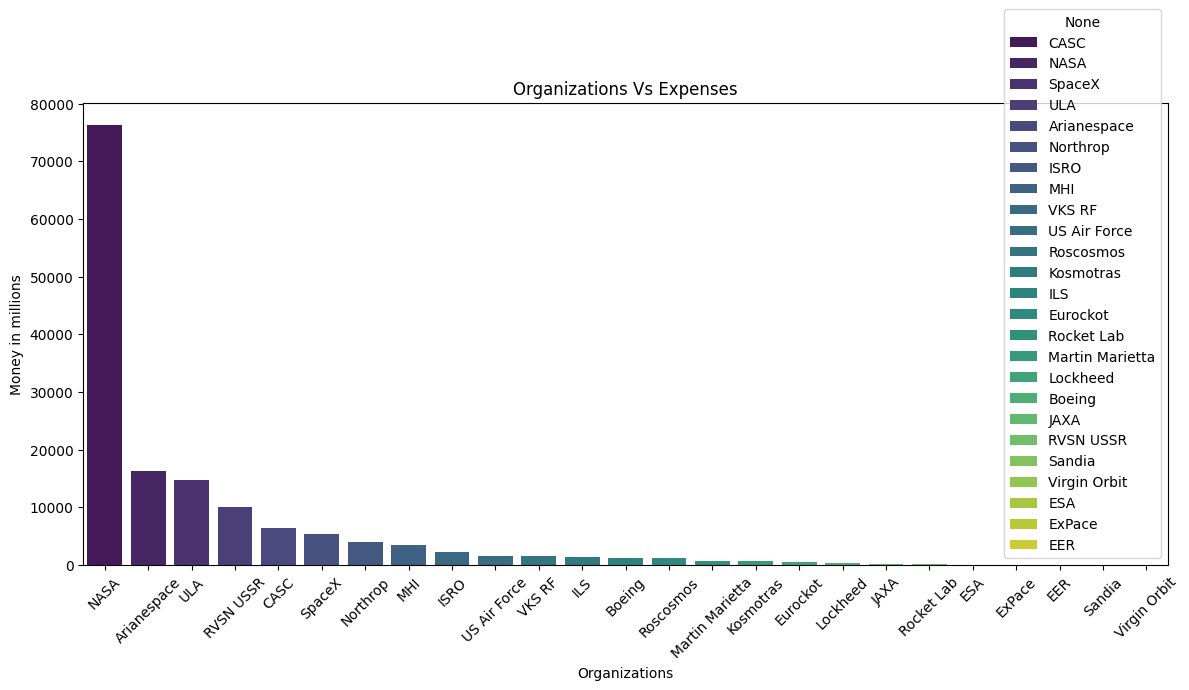

In [ ]:
plt.figure(figsize=(14, 6))

# Use Seaborn for a better bar chart
sns.barplot(x=df_organisation_expenses.Organisation,
            y=df_organisation_expenses.Price,
            palette='viridis',
            hue=organization_counts.index)
plt.xlabel('Organizations')
plt.ylabel('Money in millions')
plt.title('Organizations Vs Expenses')
plt.xticks(rotation=45)
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_organisation_expense_per_launch = df_data_clean.groupby('Organisation')['Price'].mean().reset_index()
df_organisation_expense_per_launch=df_organisation_expense_per_launch.sort_values('Price', ascending=False)

In [ ]:
fig = px.bar(df_organisation_expense_per_launch, x='Organisation', y='Price', title='Organizations Vs Mean Expenses',
             labels={'Organisation': 'Organizations', 'Price': 'Mean Expense'},
             hover_name='Organisation', hover_data={'Price': ':,.2f'},
             color='Organisation')

fig.update_layout(xaxis_tickangle=-45, xaxis=dict(type='category'))
fig.show()

# Chart the Number of Launches per Year

In [ ]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    964 non-null    object
 1   Location        964 non-null    object
 2   Date            964 non-null    object
 3   Detail          964 non-null    object
 4   Rocket_Status   964 non-null    object
 5   Price           964 non-null    object
 6   Mission_Status  964 non-null    object
dtypes: object(7)
memory usage: 60.2+ KB


In [ ]:
df_data_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [ ]:
df_data_clean['Date'] = df_data_clean['Date'].str.extract(r'([A-Za-z]{3} [A-Za-z]{3} \d{1,2}, \d{4})')


In [ ]:
df_data_clean['Date'] = pd.to_datetime(df_data_clean['Date'])
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    964 non-null    object        
 1   Location        964 non-null    object        
 2   Date            964 non-null    datetime64[ns]
 3   Detail          964 non-null    object        
 4   Rocket_Status   964 non-null    object        
 5   Price           964 non-null    object        
 6   Mission_Status  964 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 60.2+ KB


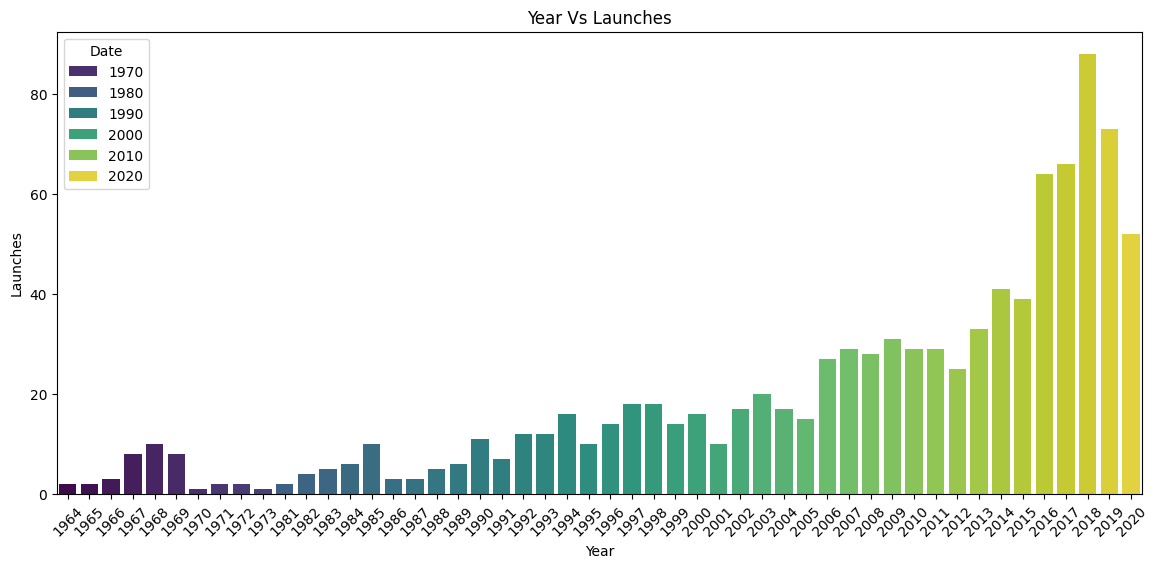

In [ ]:
# Group by year and count occurrences
yearly_counts = df_data_clean.groupby(df_data_clean['Date'].dt.year).size()
plt.figure(figsize=(14, 6))
sns.barplot(x=yearly_counts.index,
            y=yearly_counts.values,
            palette='viridis',
            hue=yearly_counts.index)
plt.xlabel('Year')
plt.ylabel('Launches')
plt.title('Year Vs Launches')
plt.xticks(rotation=45)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

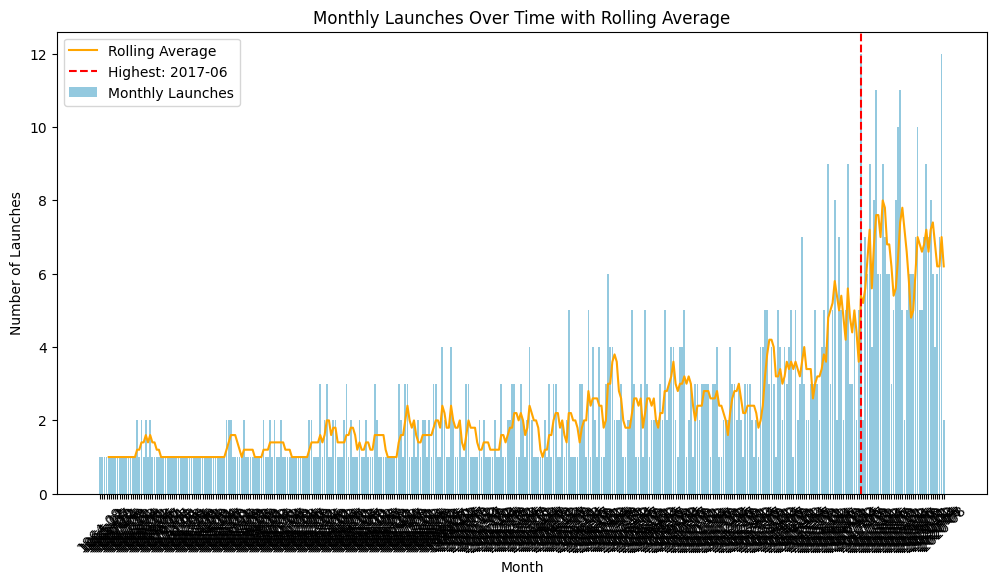

In [ ]:
df_data_clean['Month'] = df_data_clean['Date'].dt.to_period('M')

# Group by month and count launches
monthly_counts = df_data_clean.groupby('Month').size()

# Find the month with the highest number of launches
max_month = monthly_counts.idxmax()


# Calculate rolling average (adjust window size as needed)
rolling_avg = monthly_counts.rolling(window=5).mean()

# Convert Period objects to strings
monthly_counts.index = monthly_counts.index.astype(str)
rolling_avg.index = rolling_avg.index.astype(str)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, color='skyblue', label='Monthly Launches')
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, color='orange', label='Rolling Average')
plt.axvline(x=str(max_month), color='red', linestyle='--', label=f'Highest: {max_month}')
plt.title('Monthly Launches Over Time with Rolling Average')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

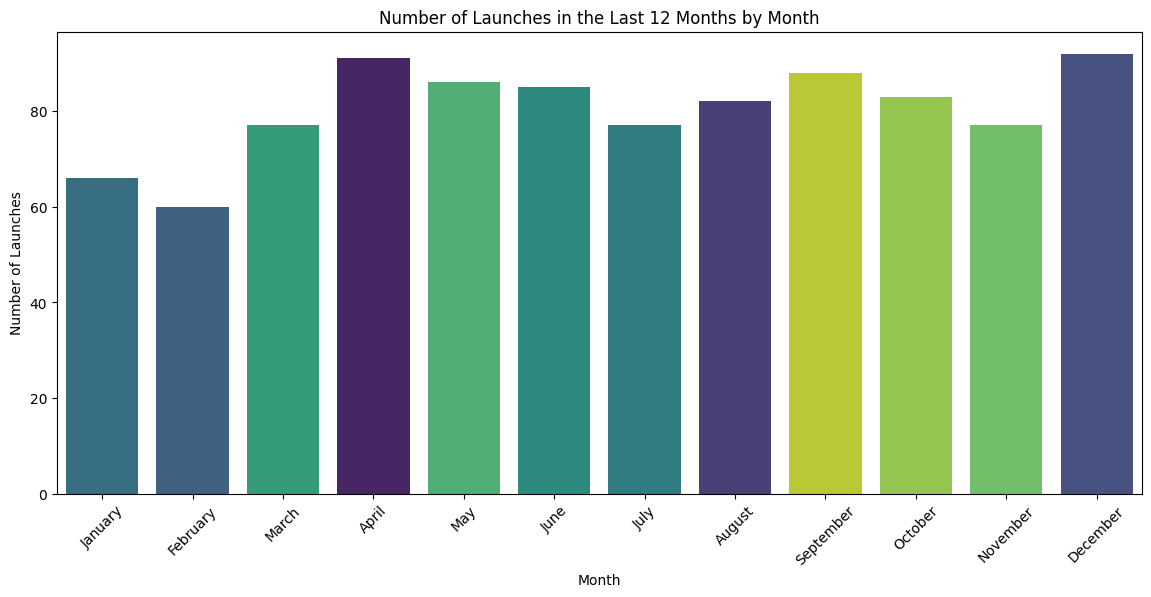

In [ ]:
# Extract month and year from the 'Date' column
df_data_clean['Month'] = df_data_clean['Date'].dt.month_name()
monthly_counts = df_data_clean.groupby(df_data_clean['Month']).size()
 #Order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plotting with Seaborn
plt.figure(figsize=(14, 6))
sns.barplot(x=monthly_counts.index,
            y=monthly_counts.values,
            order=month_order,
            palette='viridis',
            hue=monthly_counts.index)
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.title('Number of Launches in the Last 12 Months by Month')
plt.xticks(rotation=45)
plt.show()



In [ ]:
df_data_clean['Year'] = df_data_clean['Date'].dt.year
df_data_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Month,Year,Countries,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,August,2020,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,August,2020,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,July,2020,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,July,2020,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,July,2020,China,CHN


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
# Group by date and calculate the average price
average_price_over_time = df_data_clean.groupby('Year')['Price'].mean().reset_index()


In [ ]:
fig = px.line(average_price_over_time, x="Year", y="Price", title='Average Price of Rocket Launches Over Time')
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
# Group by organization and year, then calculate the size (count) of launches
launches_over_time_org = df_data_clean.groupby(['Organisation', 'Year'])['Price'].size().reset_index(name='LaunchCount')

print(launches_over_time_org)

     Organisation  Year  LaunchCount
0     Arianespace  2002            1
1     Arianespace  2004            3
2     Arianespace  2005            2
3     Arianespace  2006            5
4     Arianespace  2007            4
..            ...   ...          ...
263        VKS RF  2017            3
264        VKS RF  2018            4
265        VKS RF  2019            5
266        VKS RF  2020            1
267  Virgin Orbit  2020            1

[268 rows x 3 columns]


In [ ]:
# Get the top 10 organizations based on launch count
top_10_organizations = launches_over_time_org.groupby('Organisation')['LaunchCount'].sum().nlargest(10).index

# Filter the DataFrame for the top 10 organizations
top_10_df = launches_over_time_org[launches_over_time_org['Organisation'].isin(top_10_organizations)]

# Plot using Plotly Express
fig = px.bar(top_10_df, x='Year', y='LaunchCount', color='Organisation',
             labels={'LaunchCount': 'Launch Count'},
             title='Top 10 Organisations by Launch Count Over Time')
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
# Get the top 10 organizations based on launch count
top_3_organizations = launches_over_time_org.groupby('Organisation')['LaunchCount'].sum().nlargest(3).index

# Filter the DataFrame for the top 10 organizations
top_3_df = launches_over_time_org[launches_over_time_org['Organisation'].isin(top_3_organizations)]

# Plot using Plotly Express
fig = px.bar(top_3_df, x='Year', y='LaunchCount', color='Organisation',
             labels={'LaunchCount': 'Launch Count'},
             title='Top 10 Organisations by Launch Count Over Time')
fig.show()